Importing Libraries

In [821]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
#from xgboost import XGBClassifier
from xgboost import XGBClassifier

from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

Load Data

In [822]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
display(train.head())
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [823]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [824]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [825]:
train.duplicated().sum()

0

In [826]:
test.duplicated().sum()

0

In [827]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Different Data Types:

Continuous : Age, Fare || 
Discrete : SibSp, Parch || 
Nominal : Survived, Sex, Embarked || 
Ordinal : Pclass

In [828]:
num_var = ['Age', 'Fare', 'SibSp', 'Parch']
cat_var = ['Sex', 'Embarked','Pclass']
target = 'Survived'

In [829]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Almost 38% passengers survived.

<AxesSubplot:>

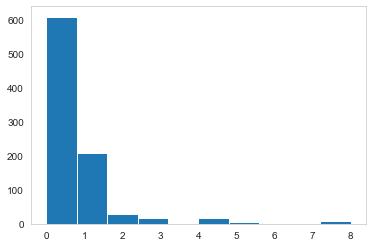

In [830]:
train['SibSp'].hist(grid=False)

<AxesSubplot:>

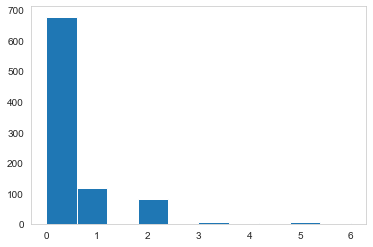

In [831]:
train['Parch'].hist(grid=False)

<AxesSubplot:>

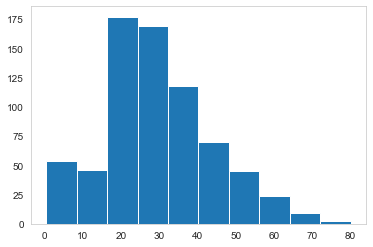

In [832]:
train['Age'].hist(grid=False)

Most of the passengers are single (or alone) follwed by having 1 family memeber. Average age of the passengers is 30 yrs and most of them belongs in the 12-35 year group range.

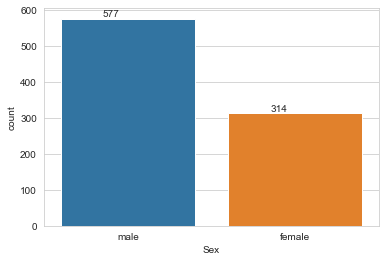

In [833]:
ax = sns.countplot(x ='Sex', data=train)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+5))

plt.show()

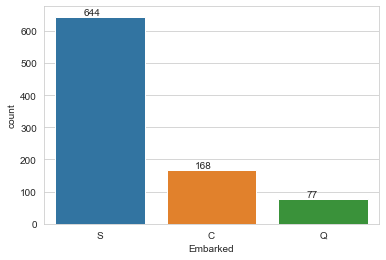

In [834]:
ax = sns.countplot(x ='Embarked', data=train)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+5))

plt.show()

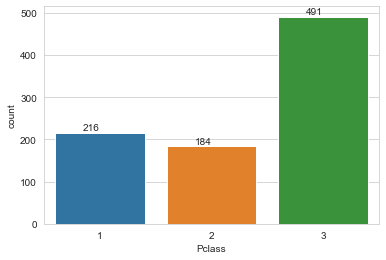

In [835]:
ax = sns.countplot('Pclass', data= train)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+5))

plt.show()

Almost 65% of the passengers are male. More than 70% of the passengers are embarked from S port and most of the passengers belongs to class 3.

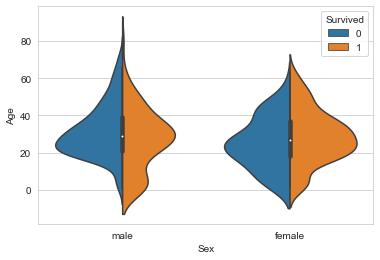

In [836]:
sns.violinplot(data=train, x="Sex", y="Age", hue="Survived" ,split=True)
plt.show()

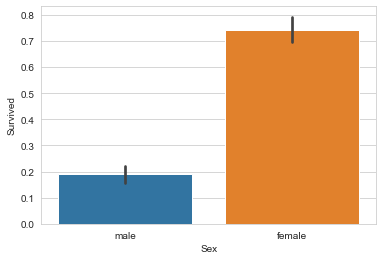

In [837]:
sns.barplot(x='Sex', y='Survived', data=train);

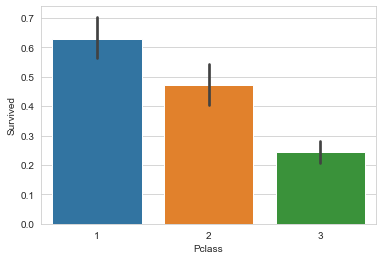

In [838]:
sns.barplot(x="Pclass", y="Survived", data=train);

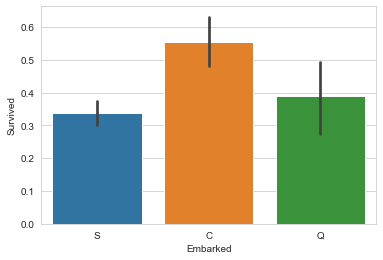

In [839]:
sns.barplot(x='Embarked', y='Survived', data=train);

Female has more than 3 times more chances of survival and it is around 72%. Class 1 and Embarked from port C also has high probability of survival.

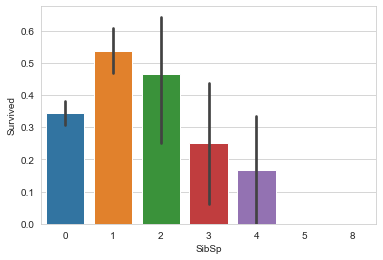

In [840]:
sns.barplot(x='SibSp', y='Survived', data = train);

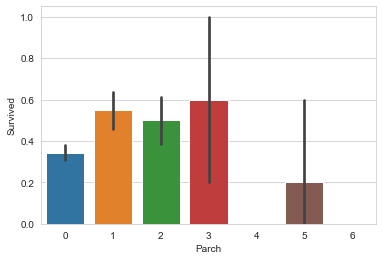

In [841]:
sns.barplot(x='Parch', y='Survived', data = train);

The passengers with small family size has high chances of survival.

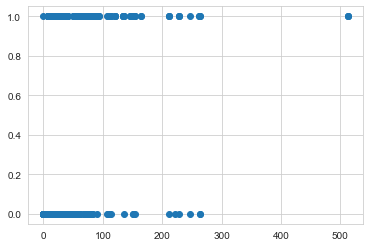

In [842]:
plt.scatter(x='Fare', y='Survived', data=train)

Passengers with high fare are more likely to survive and for low and middle range fare there is no clear distinction.

#Feature Engineering

In [843]:
#From name column we can extract the title
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [844]:
train['Title'] = train['Name'].str.extract('([A-Za-z]+)\.')
test['Title'] = test['Name'].str.extract('([a-zA-Z]+)\.')
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [845]:
def conv_title (title):
    if title in ["Ms", "Mile", "Miss"]:
        return "Miss"
    elif title in ["Mme", "Mrs"]:
        return "Mrs"
    elif title == 'Mr':
        return 'Mr'
    elif title == 'Master':
        return 'Master'
    else:
        return 'Other'
train['Title'] = train['Title'].map(conv_title)
test['Title'] = test['Title'].map(conv_title)
train['Title'].value_counts()

Mr        517
Miss      183
Mrs       126
Master     40
Other      25
Name: Title, dtype: int64

In [846]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs


In [847]:
train = train.drop(columns = ['PassengerId','Name','Ticket','Cabin'], axis =1)
test = test.drop(columns = ['PassengerId','Name','Ticket','Cabin'], axis =1)

In [848]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


For substituting age missing values it will be better to check the correlation with other variables rather than just imputing with mean or median values.

In [849]:
train.corr()['Age'].sort_values(ascending=False)

Age         1.000000
Fare        0.096067
Survived   -0.077221
Parch      -0.189119
SibSp      -0.308247
Pclass     -0.369226
Name: Age, dtype: float64

Can't find any variable which have high correlation. let's check for categorical variables.

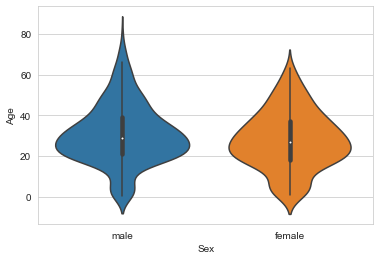

In [850]:
sns.violinplot(x='Sex', y='Age', data = train);

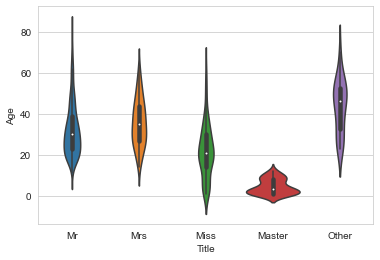

In [851]:
sns.violinplot(x='Title', y='Age', data = train);

Title seems good representations of the age hence we can use this for missing values of age.

In [852]:
train[['Title','Age']].groupby(by='Title').mean()

,Age
Title,
Master,4.574167
Miss,21.816327
Mr,32.368090
Mrs,35.788991
Other,43.750000


In [853]:
data = [train,test]

for df in data:
    df.loc[(df["Age"].isnull()) & (df["Title"]=='Master'), 'Age'] = 5
    df.loc[(df["Age"].isnull()) & (df["Title"]=='Miss'), 'Age'] =22
    df.loc[(df["Age"].isnull()) & (df["Title"]=='Mr'), 'Age'] =32
    df.loc[(df["Age"].isnull()) & (df["Title"]=='Mrs'), 'Age'] =36
    df.loc[(df["Age"].isnull()) & (df["Title"]=='Other'), 'Age'] =44


In [854]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       0
dtype: int64

In [855]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
Title       0
dtype: int64

In [856]:
test.corr()['Fare'].sort_values(ascending=False)

Fare      1.000000
Age       0.325291
Parch     0.230046
SibSp     0.171539
Pclass   -0.577147
Name: Fare, dtype: float64

In [857]:
test.groupby('Pclass').mean()['Fare'][3]

12.45967788018433

In [858]:
test.Fare.fillna(test.groupby('Pclass').mean()['Fare'][3], inplace=True)

For 3 discrete variable SibSp & Parch, we can create a new variable to understand if the passenger is alone or with family.

In [859]:
data = [train, test]
for df in data:
    df['Relatives'] = df['SibSp'] + df['Parch']
    df.loc[df['Relatives'] > 0, 'Alone'] = 1
    df.loc[df['Relatives'] == 0, 'Alone'] = 0

In [860]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Relatives,Alone
0,0,3,male,22.0,1,0,7.2500,S,Mr,1,1.0
1,1,1,female,38.0,1,0,71.2833,C,Mrs,1,1.0
2,1,3,female,26.0,0,0,7.9250,S,Miss,0,0.0
3,1,1,female,35.0,1,0,53.1000,S,Mrs,1,1.0
4,0,3,male,35.0,0,0,8.0500,S,Mr,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Other,0,0.0
887,1,1,female,19.0,0,0,30.0000,S,Miss,0,0.0
888,0,3,female,22.0,1,2,23.4500,S,Miss,3,1.0
889,1,1,male,26.0,0,0,30.0000,C,Mr,0,0.0


In [861]:
train.drop(columns = ['SibSp','Parch'], inplace=True, axis = 1)

In [862]:
test.drop(columns = ['SibSp','Parch'], inplace=True, axis = 1)

In [863]:
train

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Relatives,Alone
0,0,3,male,22.0,7.2500,S,Mr,1,1.0
1,1,1,female,38.0,71.2833,C,Mrs,1,1.0
2,1,3,female,26.0,7.9250,S,Miss,0,0.0
3,1,1,female,35.0,53.1000,S,Mrs,1,1.0
4,0,3,male,35.0,8.0500,S,Mr,0,0.0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,Other,0,0.0
887,1,1,female,19.0,30.0000,S,Miss,0,0.0
888,0,3,female,22.0,23.4500,S,Miss,3,1.0
889,1,1,male,26.0,30.0000,C,Mr,0,0.0


Now encoding the categorical variables

In [887]:
train['Sex'] = np.where(train['Sex']=='male', 1,0)
test['Sex'] = np.where(test['Sex']=='male', 1,0)
train

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Relatives,Alone
0,0,3,0,22.0,7.2500,S,Mr,1,1.0
1,1,1,0,38.0,71.2833,C,Mrs,1,1.0
2,1,3,0,26.0,7.9250,S,Miss,0,0.0
3,1,1,0,35.0,53.1000,S,Mrs,1,1.0
4,0,3,0,35.0,8.0500,S,Mr,0,0.0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,13.0000,S,Other,0,0.0
887,1,1,0,19.0,30.0000,S,Miss,0,0.0
888,0,3,0,22.0,23.4500,S,Miss,3,1.0
889,1,1,0,26.0,30.0000,C,Mr,0,0.0


In [888]:
df_train = pd.get_dummies(train, columns =['Embarked','Title'], drop_first=True)
df_train

,Survived,Pclass,Sex,Age,Fare,Relatives,Alone,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0,3,0,22.0,7.2500,1,1.0,0,1,0,1,0,0
1,1,1,0,38.0,71.2833,1,1.0,0,0,0,0,1,0
2,1,3,0,26.0,7.9250,0,0.0,0,1,1,0,0,0
3,1,1,0,35.0,53.1000,1,1.0,0,1,0,0,1,0
4,0,3,0,35.0,8.0500,0,0.0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,13.0000,0,0.0,0,1,0,0,0,1
887,1,1,0,19.0,30.0000,0,0.0,0,1,1,0,0,0
888,0,3,0,22.0,23.4500,3,1.0,0,1,1,0,0,0
889,1,1,0,26.0,30.0000,0,0.0,0,0,0,1,0,0


In [889]:
df_test = pd.get_dummies(test, columns=["Embarked", "Title"],drop_first=True)
df_test

,Pclass,Sex,Age,Fare,Relatives,Alone,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,3,0,34.5,7.8292,0,0.0,1,0,0,1,0,0
1,3,0,47.0,7.0000,1,1.0,0,1,0,0,1,0
2,2,0,62.0,9.6875,0,0.0,1,0,0,1,0,0
3,3,0,27.0,8.6625,0,0.0,0,1,0,1,0,0
4,3,0,22.0,12.2875,2,1.0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,32.0,8.0500,0,0.0,0,1,0,1,0,0
414,1,0,39.0,108.9000,0,0.0,0,0,0,0,0,1
415,3,0,38.5,7.2500,0,0.0,0,1,0,1,0,0
416,3,0,32.0,8.0500,0,0.0,0,1,0,1,0,0


Building the model

In [890]:
#Splitting dataset

X_train = df_train.drop('Survived', axis=1)
y_train = df_train['Survived']
X_test = df_test.copy()

In [891]:
#Feature Scaling

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [892]:
X_train_scaled

array([[ 0.82737724,  0.        , -0.58248511, ...,  0.85053175,
        -0.40583972, -0.16990692],
       [-1.56610693,  0.        ,  0.62462384, ..., -1.17573506,
         2.4640269 , -0.16990692],
       [ 0.82737724,  0.        , -0.28070787, ..., -1.17573506,
        -0.40583972, -0.16990692],
       ...,
       [ 0.82737724,  0.        , -0.58248511, ..., -1.17573506,
        -0.40583972, -0.16990692],
       [-1.56610693,  0.        , -0.28070787, ...,  0.85053175,
        -0.40583972, -0.16990692],
       [ 0.82737724,  0.        ,  0.17195799, ...,  0.85053175,
        -0.40583972, -0.16990692]])

Building the classification model

In [893]:
classifiers = {
    "KNN": KNeighborsClassifier(), 
    "LR": LogisticRegression(max_iter=1000), 
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "SVM": SVC(),
    "MLP": MLPClassifier(max_iter=1000),
    "XGB": XGBClassifier(),
    "LGBM": LGBMClassifier()
}

results = pd.DataFrame(columns=["Classifier", "Avg_Accuracy", "Avg_F1_Score"])
for name, clf in classifiers.items():
    model = clf
    cv_results = cross_validate(
        model, X_train_scaled, y_train, cv=10,
        scoring=(['accuracy', 'f1'])
    )

    results = results.append({
        "Classifier": name,
        "Avg_Accuracy": cv_results['test_accuracy'].mean(),
        "Avg_F1_Score": cv_results['test_f1'].mean()
    }, ignore_index=True)
    
results["Avg_Overall"] = (results["Avg_Accuracy"] + results["Avg_F1_Score"]) / 2
results = results.sort_values("Avg_Overall", ascending=False)
results

,Classifier,Avg_Accuracy,Avg_F1_Score,Avg_Overall
1,LR,0.827166,0.765242,0.796204
7,LGBM,0.823845,0.763122,0.793483
3,RF,0.820474,0.756178,0.788326
4,SVM,0.820449,0.743753,0.782101
6,XGB,0.811486,0.749097,0.780291
5,MLP,0.815955,0.738471,0.777213
0,KNN,0.813783,0.738622,0.776202
2,DT,0.780062,0.71712,0.748591


#Hyperparameter Tuning

In [894]:
lr = LogisticRegression()
params = {'penalty':("l1", "l2", "elasticnet"),
         'C':(10 , 1 , 0.1 , 0.01),
         'tol':(0.1 , 0.01, 0.001, 0.0001)}
clf = GridSearchCV(lr, param_grid = params,cv =10)
clf.fit(X_train_scaled, y_train)
print('Best Parameters :', clf.best_params_)

Best Parameters : {'C': 1, 'penalty': 'l2', 'tol': 0.1}


In [895]:
clf.best_score_

0.8271660424469414

In [896]:
y_pred = clf.predict(X_train_scaled)

<AxesSubplot:>

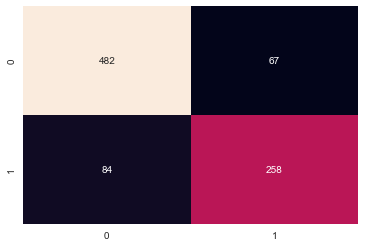

In [897]:
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, cbar=False, fmt ='.3g')

In [898]:
accuracy_score(y_train, y_pred)

0.8305274971941639

So our model accuracy is 83%. So with 83% accuracy we can predict if the passenger is survived or not.